In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the “housing.csv” file from the folder into the program.
house = pd.read_excel('1553768847_housing.xlsx')

In [4]:
# Print first few rows of this data.
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Handle missing values
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
# Fill the missing values with the mean of the respective column.
house.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [8]:
data_house=house.fillna("537.870553")

In [9]:
data_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
# Convert categorical column in the dataset to numerical data. 
data_house_dummy=pd.get_dummies(data=data_house,columns=['ocean_proximity'],drop_first=True)

In [11]:
data_house_dummy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,0,0,1,0


In [12]:
titles = list(data_house_dummy.columns)

In [13]:
titles

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [14]:
titles[0],titles[8]= titles[8],titles[0]

In [15]:
titles

['median_house_value',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'longitude',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [16]:
data_house_dummy=data_house_dummy[titles]

In [17]:
data_house_dummy

,median_house_value,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,452600,37.88,41,880,129,322,126,8.3252,-122.23,0,0,1,0
1,358500,37.86,21,7099,1106,2401,1138,8.3014,-122.22,0,0,1,0
2,352100,37.85,52,1467,190,496,177,7.2574,-122.24,0,0,1,0
3,341300,37.85,52,1274,235,558,219,5.6431,-122.25,0,0,1,0
4,342200,37.85,52,1627,280,565,259,3.8462,-122.25,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100,39.48,25,1665,374,845,330,1.5603,-121.09,1,0,0,0
20636,77100,39.49,18,697,150,356,114,2.5568,-121.21,1,0,0,0
20637,92300,39.43,17,2254,485,1007,433,1.7000,-121.22,1,0,0,0
20638,84700,39.43,18,1860,409,741,349,1.8672,-121.32,1,0,0,0


In [18]:
# Extract input (X) and output (Y) data from the dataset.
y=data_house_dummy.median_house_value 
x=data_house_dummy.iloc[:,1:]

In [19]:
# Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [21]:
data_house_dummy.head()

,median_house_value,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,longitude,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,452600,37.88,41,880,129,322,126,8.3252,-122.23,0,0,1,0
1,358500,37.86,21,7099,1106,2401,1138,8.3014,-122.22,0,0,1,0
2,352100,37.85,52,1467,190,496,177,7.2574,-122.24,0,0,1,0
3,341300,37.85,52,1274,235,558,219,5.6431,-122.25,0,0,1,0
4,342200,37.85,52,1627,280,565,259,3.8462,-122.25,0,0,1,0


In [22]:
#standardise data
from sklearn.preprocessing import StandardScaler

In [23]:
#create an estimator object for scaler
stdSc=StandardScaler()

In [24]:
stdSc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
x_train_std=stdSc.transform(x_train)

In [26]:
x_test_std=stdSc.transform(x_test)

In [27]:
pd.DataFrame(x_train_std)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.324919,-0.764262,1.068091,0.412186,0.436631,0.327101,1.808122,-1.552206,-0.679323,-0.013923,-0.353669,-0.386732
1,-1.252070,-0.843631,-0.480400,-0.641939,-0.768275,-0.670119,1.097891,1.159540,-0.679323,-0.013923,-0.353669,2.585768
2,-0.442961,-0.764262,-0.955697,-0.972692,-0.971859,-1.027760,-0.349490,0.646103,1.472053,-0.013923,-0.353669,-0.386732
3,-0.990162,-1.240475,-1.084700,-1.179710,-1.141367,-1.194834,1.645924,1.189449,-0.679323,-0.013923,-0.353669,-0.386732
4,1.399750,-0.605525,0.283095,0.535921,0.269744,0.616870,-0.717009,-0.919133,1.472053,-0.013923,-0.353669,-0.386732
...,...,...,...,...,...,...,...,...,...,...,...,...
15475,1.236058,-0.684894,-0.607115,-0.734740,-0.624105,-0.732771,0.283891,-0.844361,1.472053,-0.013923,-0.353669,-0.386732
15476,0.866580,-0.129313,-0.696777,-0.815644,-0.680899,-0.758876,-0.507307,-0.659922,1.472053,-0.013923,-0.353669,-0.386732
15477,0.445656,0.188162,-0.553593,0.000222,-0.631095,-0.278540,-0.357302,-1.163390,-0.679323,-0.013923,-0.353669,2.585768
15478,-0.938716,0.426268,-0.236118,-0.094650,-0.327029,-0.082751,0.927301,0.815587,-0.679323,-0.013923,-0.353669,-0.386732


In [28]:
#build model
from sklearn.linear_model import LinearRegression

In [42]:
regModel=LinearRegression()

In [43]:
regModel.fit(x_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
regModel.score(x_train_std,y_train)

0.6475931930644808

In [45]:
regModel.score(x_test_std,y_test)

0.6384081651709086

In [33]:
pd.DataFrame(data_house_dummy.median_income)

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [34]:
data_house_dummy.median_income

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [36]:
#build a model with median_income
x=pd.DataFrame(data_house_dummy.median_income)
y=data_house_dummy.median_house_value

In [37]:
#model
from sklearn.linear_model import LinearRegression

In [46]:
regModel=LinearRegression()

In [48]:
regModel.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
regModel.score(x,y)

0.47344749180719903

In [50]:
#print prediction as per model
est1=regModel.predict(x)

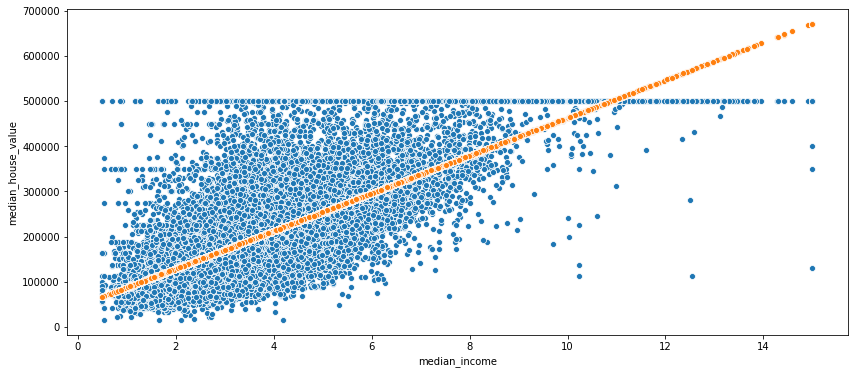

In [51]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=data_house_dummy.median_income,y=data_house_dummy.median_house_value)
sns.scatterplot(x=data_house_dummy.median_income,y=est1)
plt.show()